<a href="https://colab.research.google.com/github/karentp/ProbabilisticModelsProjects/blob/main/P4_4_1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

Primer semestre del 2022

---

* Estudiante: **Nombre completo**
* Carné: **B12345**
* Grupo: **1/2**

---
# `P4` - *Modulación digital IQ*

> La modulación digital en los sistemas de comunicación es una aplicación importante del análisis de procesos aleatorios. Este proyecto presenta una introdución a tópicos fundamentales de la ingeniería de comunicaciones para simular un sistema de transmisión de imágenes de baja resolución.

---

<span id="Chapter1"></span>

## 1. - Una introducción a los sistemas de comunicaciones

La ingeniería de comunicaciones es la rama de la ciencia y la tecnología que concibe y crea sistemas de transmisión de información entre emisores y receptores separados espacial o temporalmente. 

El modelo más generalizado de un sistema de comunicaciones incluye una fuente de información, un transmisor que codifica la información, un esquema de modulación que adapta la señal al medio, un canal de transmisión, un receptor que decodifica la información y un destino. El siguiente es un ejemplo de envío de imágenes: 

<img align='center' src='https://i.imgur.com/ZqQ9Psh.png' width ='450'/>

Un sistema de comunicaciones completo implica etapas altamente complejas y detalladas, tales como la multiplexación de múltiples usuarios, compresión de la información, así como corrección de datos erróneos. En esta actividad se estudiará solamente **los esquemas de modulación digital y el canal ruidoso**, que corresponde a dos de las etapas más relevantes.

### 1.1. - La modulación digital

Supóngase, por ejemplo, la tramisión inalámbrica de una imagen a largas distancias, ¿cómo es posible enviar sus pixeles (que se asumen como "algo digital") de un punto a otro, a través de un medio físico que es esencialmente "analógico"?

La *modulación* en ingeniería de comunicaciones consiste en depositar la información de una **señal moduladora** (fuente de información) en una **señal portadora** que está diseñada para el medio físico de transmisión. En el caso específico de la modulación *digital*, la fuente de información es, precisamente, *digital* (discreta en el tiempo y la amplitud).

<img align='center' src='https://i.imgur.com/eVnhbbG.png' width ='400'/>

La modulación sirve dos propósitos importantes:

* La señal portadora está **adaptada al medio** por el que se va a transmitir o a las tecnologías que se utilizan para ello. Por ejemplo: una señal de audio, en sus frecuencias originales, no puede ser transmitida eficientemente con antenas pequeñas y portables. Otro ejemplo: las señales digitales cuadradas (transiciones entre 0 y 1) sufrirían graves distorsiones y atenuación si se transmiten tal cual a grandes distancias por un conductor eléctrico.
* Como la señal portadora puede modificarse a conveniencia, es posible crear esquemas de **acceso al medio** para múltiples usuarios. Por ejemplo: la modulación FM (*frequency modulation*) utiliza distintas franjas del espectro radioeléctrico para acomodar distintas emisiones ("radioemisoras").

La modulación *digital* presenta ventajas adicionales:

* Un esquema de modulación con técnicas de codificación apropiadas es capaz de reconstruir señales distorsionadas.
* El flujo de información (bits por unidad de tiempo) es adaptativo, según las condiciones del canal.

### 1.2. - La demodulación

Si una señal ha atravesado un canal físico y se encuentra en el receptor: *¿cómo pueden los bits ser reconstruidos nuevamente a partir de la señal modulada $s(t)$ que fue recibida?*, *¿qué ocurrirá si esta señal fue distorsionada por cierto ruido durante su travesía por el medio de transmisión?* Estas son preguntas claves para el diseño de sistema de comunicación.

Algunas de las técnicas de procesamiento de señales para extraer la información de la señal son:

* Demodulación por **detección de envolvente**
* Demodulación por **detección de energía**
* Demodulación por **mínima distancia euclidiana**
* Demodulación por **detección de lazo de seguimiento de fase** (PLL)
* Demodulación por **detección de potencia en recepción**

### 1.3. - Sobre canales ruidosos

> El ruido en un medio de transmisión generalmente se debe a variables físicas de comportamiento aleatorio. Por ejemplo: los fenómenos atmosféricos, las vibraciones, la interferencia entre señales y la temperatura.

En particular, los sistemas eléctricos y electrónicos son comúnmente afectados por el denominado **ruido aditivo blanco gaussiano** (AWGN, por las siglas en inglés de *Additive White Gaussian Noise*).

* Es **aditivo** porque la perturbación se "adhiere" o se "suma" a la señal viajera $s(t)$ al atravesar un determinado canal. De forma genérica, la señal resultante es la original más ruido, es decir, $\hat{s}(t) = s(t) + n(t)$.
* Es **blanco** porque tiene una [densidad espectral de potencia](https://es.wikipedia.org/wiki/Densidad_espectral) aproximadamente constante dentro del ancho de banda de interés, es decir, está presente en todos los componentes de frecuencia. ¿Por qué entonces "blanco"?
* Es **gaussiano** porque la función de densidad probabilística (PDF) de la **amplitud** del ruido es precisamente una distribución normal, con parámetros tales que la media es típicamente cero (lo que implica que tiene valores positivos y negativos) y la varianza tiene un valor relacionado con la potencia del ruido.

<img align='center' src='https://i.imgur.com/gtiM5SJ.png' width='850'/>

### 1.4 -  La relación señal-a-ruido

La relación señal-a-ruido (**SNR**, *Signal-to-Noise Ratio*) es una medida de la proporción entre la potencia $P_s$ de una señal $s(t)$ y la potencia $P_n$ del ruido $n(t)$ que la corrompe. Su magnitud suele ser especificada en decibel (dB). Un SNR alto indica que la presencia de una señal es más fuerte que la presencia del ruido, mientras que un SNR bajo indica lo contrario. Por ejemplo: el audio de un disco de vinilo tiene un SNR de unos 60 dB mientras que un disco compacto tiene 90 dB.

Su relación se expresa de la siguiente manera:

$$
\mathrm{SNR}_{\mathrm{dB}} = 10\log(\mathrm{SNR}) = 10\log\left ( \frac{P_s}{P_n} \right )
$$

Dado lo anterior, 60 dB implica una señal un millón de veces más potente que el ruido, y 90 dB es mil millones de veces más grande. Hay que notar que la percepción humana de la audición no es lineal (un CD no sería "mil veces más bueno" que un vinilo...), y por eso se utiliza una medida logarítmica como el dB.

### 1.5 - Tasa de error binario

La tasa de error de bit (**BER**, *Bit Error Rate*) es una medida del error $P(\epsilon)$ que contiene un medio de transmisión no ideal (ruidoso). Según la definición estadística de la probabilidad, la probabilidad de ocurrencia de un suceso es la razón de los casos favorables entre los casos posibles:

$$
\displaystyle
P(\epsilon) = \frac{\text{bits fallidos}}{\text{bit totales}}
$$

En sistemas de comunicaciones usuales, las tasas de error aceptables son de $10^{-5}$ o menores (un error por cada cien mil bits).

---
## 2. - Conceptos básicos del procesamiento de imágenes


### 2.1 - Los píxeles

Una imagen digital es un conjunto de pixeles (unidad mínima de color) en un plano. La sinergia de sus colores permite visualizar una imagen con sentido para el ojo humano.

<img align='center' src='https://i.imgur.com/ohBErgV.jpg' width='350'/>

### 2.2 - El modelo de colores *RGB*

El modelo RGB (por las siglas en inglés de *Red, Green, Blue*) es el esquema de colores digitales más tradicional. Es "aditivo" en el sentido de que los colores se forman por la combinación de los componentes R, G, y B. Algunos ejemplos son: 

| Color             |                       Tripleta RGB                         | 
|-----------------------|----------------------------------------------------------------|
| <img src="https://i.pinimg.com/564x/2c/c6/2e/2cc62efc5998bc3bfdec089acf1e12c4.jpg" width="30"></img>                  |          `(255, 0, 0)`         |
| <img src="https://i.pinimg.com/564x/ad/2f/b5/ad2fb5dd9b658483cb5c4f6120fe528b.jpg" width="30"></img> |          `(0, 0, 255)`         |
| <img src="https://i.pinimg.com/564x/26/8b/2c/268b2c4f2742bfdc73dfbc8154ef5d11.jpg" width="30"></img> |          `(0, 0, 255)`         |
| <img src="https://i.pinimg.com/564x/e5/be/78/e5be78c8312fd6ce650408abb87bd0ce.jpg" width="30"></img>                  |          `(0, 0, 0)`         |
| <img src="https://i.pinimg.com/564x/a2/73/09/a27309683bfcaaf152864a0e19e79fd9.jpg" width="30"></img>                  |          `(0, 0, 128)`         |

A cada color se le denomina **canal**, de forma que un pixel RGB tiene tres canales. El modelo RGB es un esquema de colores discreto: cada canal tiene un rango de libertad entre 0 y 255, es decir, 256 tonos posibles por canal. La cantidad de memoria necesaria para almacenar un canal es de 8 bits, lo que significa que un pixel RGB tiene 8 $\times$ 3 = 24 bits. Afirmar que un televisor tiene 16 millones de colores es porque:

$$
256 \times 256 \times 256 = 2^{24} = 16\,777\,216 \,\text{combinaciones de colores}
$$

### 2.3 - El formato de compresión de imágenes *JPG*

Las imágenes digitales con formato JPG poseen un modelo de colores **RGB** y se trata de un "formato con compresión", en el que la imagen ha sido sometida a un proceso de reducción de información redundante para "aligerar" su peso en memoria.

Por ejemplo, la imagen mostrada anteriormente es de 198 $\times$ 89 pixeles, lo que implicaría un tamaño total de 198 $\times$ 89 $\times$ 24 bit / 8 = 52,87 kB, sin embargo el tamaño del archivo de la compresión es de solamente 8,58 kB. El nivel de compresión depende de cada imagen, pero alcanza típicamente la relación 10:1.

---

## 3. - Simulando un sistema de comunicaciones 

Para utilizar los conocimientos adquiridos, se procederá a simular un **sistema de comunicaciones para la transmisión de imágenes de baja resolución**. 

El objetivo es transmitir la siguiente imagen (o cualquiera de baja resolución de su elección):

<img align='center' src='https://i.imgur.com/ohBErgV.jpg' width='250'/>

Las condiciones iniciales para el sistema de comunicaciones serán las siguientes:

* Una onda portadora banda base con **frecuencia $f_s$ = 10 kHz.**
* Una frecuencia de muestreo de **300 muestras por período**.
* Una relación señal a ruido de **0 dB**.

### 3.1. - Funciones implementadas

A continuación se especificarán las funciones desarrolladas en la simulación del sistema (considerar que en telecomunicaciones se utiliza **Tx** para referirse a transmisión y **Rx** a recepción):

* `fuente_info(imagen)`: Extrae en un `array` de NumPy los pixeles contenidos en la imagen.
* `rgb_a_bits(vector_pixel)`: Convierte los pixeles del 'array' de NumPy en una cadena `bits_Tx` continua de tamaño $(1 \times k)$, en donde $k$ es la cantidad total de bits de la imagen.
* `modulador(bits_Rx, FS, MPP)`: Convierte la señal de información (arreglo de `bits_Tx`) en una señal modulada bajo un esquema **BPSK**.
* `canal_ruidoso(senal_Tx, Pm, SNR)`: Simula un canal ruidoso con **AWGN** para `senal_Tx`.
* `demodulador(senal_Rx, carrier, MPP)`: Demodula a `senal_Rx` (señal recibida) y determina los bits recibidos usando el criterio de demodulación por detección de energía.
* `bits_a_rgb(bits_Rx, dims)`: Reconstruye los bits recibidos en `bits_Rx` en una imagen.

Las bibliotecas de Python de interés para este proyecto son:

```python
# Para manipular imágenes (Python Imaging Library)
from PIL import Image

# Para manipular 'arrays' de pixeles y bits, señales y operaciones
import numpy as np

# Para visualizar imágenes y señales
import matplotlib.pyplot as plt

# Para medir el tiempo de simulación
import time
```

#### 3.1.1 - Extracción de los pixeles de una imagen (fuente de información)

In [ ]:
from PIL import Image
import numpy as np

def fuente_info(imagen):
    '''Una función que simula una fuente de
    información al importar una imagen y 
    retornar un vector de NumPy con las 
    dimensiones de la imagen, incluidos los
    canales RGB: alto x largo x 3 canales

    :param imagen: Una imagen en formato JPG
    :return: un vector de pixeles
    '''
    img = Image.open(imagen)
    
    return np.array(img)

Es relevante analizar la salida de la función anterior.

```python
>>> pixeles = fuente_info('imagen.jpg')
>>> print('Dimensiones: ', pixeles.shape, '\n')
>>> print(pixeles)

Dimensiones: (300, 300, 3)
    
[[[132 123 118]
  [133 124 119]
  [136 127 122]
  ...
  [  8   2   2]
  [ 10   1   4]
  [ 10   1   2]]

 [[143 134 129]
  [145 136 131]
  [144 135 130]
  ...
  [ 13   3   1]
  [ 15   5   3]
  [ 15   7   5]]]
```

* Las dimensiones de la imagen elegida son (300, 300, 3); esto es su resolución: 300 px $\times$ 300 px. 
* La tercera entrada del vector de dimensiones se refiere a las tres "capas" o canales R, G y B que componen aditivamente cada uno de los pixeles de esta imagen. 
* En este caso específico hay $300 \times 300 = 90\,000$ pixeles por canal. 
* ¿Puede estimarse cuántos bits tiene la imagen? Puesto que un solo canal tiene 8 bits de profundidad (256 niveles) por pixel, entonces la imagen en transmisión tiene, *antes de la compresión*:

$$
90\,000 \times 8 \times 3 = 2\,160\,000 \,\text{bit} = 270 \,\text{kB}
$$

#### 3.1.2. - Codificación de pixeles a una base binaria (bits)

In [ ]:
import numpy as np

def rgb_a_bits(array_imagen):
    '''Convierte los pixeles de base 
    decimal (de 0 a 255) a binaria 
    (de 00000000 a 11111111).

    :param imagen: array de una imagen 
    :return: Un vector de (1 x k) bits 'int'
    '''
    # Obtener las dimensiones de la imagen
    x, y, z = array_imagen.shape
    
    # Número total de elementos (pixeles x canales)
    n_elementos = x * y * z

    # Convertir la imagen a un vector unidimensional de n_elementos
    pixeles = np.reshape(array_imagen, n_elementos)

    # Convertir los canales a base 2
    bits = [format(pixel, '08b') for pixel in pixeles]
    bits_Rx = np.array(list(''.join(bits)))
    
    return bits_Rx.astype(int)

#### 3.1.3. - Esquema de modulación BPSK

El esquema de modulación o "codificación" por desplazamiento de fase o [PSK](https://es.wikipedia.org/wiki/Modulaci%C3%B3n_por_desplazamiento_de_fase) (de *phase shift keying*) consiste, como lo sugiere su nombre, en **variar la fase** de la onda portadora $c(t)$ a partir grupos de bits codificados en símbolos discretos. El caso **BPSK** hace referencia a la modulación bi-fase, con dos símbolos disponibles. En general hay $M = 2^k$ símbolos, con $k$ la cantidad de bits para representarlos. Por tanto, con BPSK y despejando para $k$ con $M = 2$:

$$
\log_2(2) = 1 \quad \text{bit/símbolo}
$$

Puede haber un `0` o un `1` por cada símbolo. Puesto que el esquema se basa en el desplazamiento de fase entonces es conveniente asignar valores angulares de fase en radianes, como 0 y $\pi$:

$$
s(t) = A_c \cdot \sin(2\pi f_c t - \theta_c), \quad \text{con}\, \theta_c \in \{0, \pi\}
$$

Dada la identidad trigonométrica $\sin(\alpha - \pi) = \sin(-\alpha) = -\sin(\alpha)$, entonces $s(t)$ puede manipular su desplazamiento de fase variando solamente el signo de la amplitud $A_c$:

$$
A_c= 
\begin{cases}
             1, &   \text{si} \quad \theta_c = 0 \\
             -1, &  \text{si} \quad \theta_c = \pi \\
\end{cases}
$$

A través de este "artificio", la modulación **BPSK** (pero solo BPSK) pasa de ser un asunto de fases a un tema de amplitud. Esto simplifica en gran medida la programación del esquema, puesto que si el bit entrante es cero, entonces la fase de la portadora se invierte con solo usar $A_c = -1$. En el caso contrario (si el bit entrante es un uno), entonces $A_c = 1$ y ya no es necesario lidiar con las fases en términos del ángulo $\theta_c$. A continuación se muestra una implementación de esta modulación.

In [ ]:
import numpy as np

def modulador(bits, fc, mpp):
    '''Un método que simula el esquema de 
    modulación digital BPSK.

    :param bits: Vector unidimensional de bits
    :param fc: Frecuencia de la portadora en Hz
    :param mpp: Cantidad de "muestras por periodo" de onda portadora
    :return: Un vector con la señal modulada
    :return: Un valor con la potencia promedio [W]
    :return: La onda portadora c(t)
    :return: La onda cuadrada moduladora (información)
    '''
    # 1. Parámetros de la 'señal' de información (bits)
    N = len(bits) # Cantidad de bits

    # 2. Construyendo un periodo de la señal portadora c(t)
    Tc = 1 / fc  # periodo [s]
    t_periodo = np.linspace(0, Tc, mpp)  # mpp: muestras por período
    portadora = np.sin(2*np.pi*fc*t_periodo)

    # 3. Inicializar la señal modulada s(t)
    t_simulacion = np.linspace(0, N*Tc, N*mpp) 
    senal_Tx = np.zeros(t_simulacion.shape)
    moduladora = np.zeros(t_simulacion.shape)  # (opcional) señal de bits
 
    # 4. Asignar las formas de onda según los bits (BPSK)
    for i, bit in enumerate(bits):
        if bit == 1:
            senal_Tx[i*mpp : (i+1)*mpp] = portadora
            moduladora[i*mpp : (i+1)*mpp] = 1
        else:
            senal_Tx[i*mpp : (i+1)*mpp] = portadora * -1
            moduladora[i*mpp : (i+1)*mpp] = 0
    
    # 5. Calcular la potencia promedio de la señal modulada
    P_senal_Tx = (1 / (N*Tc)) * np.trapz(pow(senal_Tx, 2), t_simulacion)
    
    return senal_Tx, P_senal_Tx, portadora, moduladora  

#### 3.1.4. - Construcción de un canal con ruido AWGN

In [ ]:
import numpy as np

def canal_ruidoso(senal_Tx, Pm, SNR):
    '''Un bloque que simula un medio de trans-
    misión no ideal (ruidoso) empleando ruido
    AWGN. Recibe un vector con la señal prove-
    niente de un modulador y un valor en dB
    para la relación señal a ruido.

    :param senal_Tx: El vector del modulador
    :param Pm: Potencia de la señal modulada
    :param SNR: Relación señal-a-ruido en dB
    :return: La señal modulada "ruidosa" al dejar el canal
    '''
    # Potencia del ruido generado por el canal
    Pn = Pm / pow(10, SNR/10)

    # Generando ruido auditivo blanco gaussiano (potencia = varianza)
    ruido = np.random.normal(0, np.sqrt(Pn), senal_Tx.shape)

    # Señal distorsionada por el canal ruidoso
    senal_Rx = senal_Tx + ruido

    return senal_Rx

#### 3.1.5. - Esquema de demodulación

In [ ]:
import numpy as np

def demodulador(senal_Rx, portadora, mpp):
    '''Un método que simula un bloque demodulador
    de señales, bajo un esquema BPSK. El criterio
    de demodulación se basa en decodificación por 
    detección de energía.

    :param senal_Rx: La señal recibida del canal
    :param portadora: La onda portadora c(t)
    :param mpp: Número de muestras por periodo
    :return: Los bits de la señal demodulada
    '''
    # Cantidad de muestras en senal_Rx
    M = len(senal_Rx)

    # Cantidad de bits (símbolos) en transmisión
    N = int(M / mpp)

    # Vector para bits obtenidos por la demodulación
    bits_Rx = np.zeros(N)

    # Vector para la señal demodulada
    senal_demodulada = np.zeros(senal_Rx.shape)

    # Pseudo-energía de un período de la portadora
    Es = np.sum(portadora * portadora)

    # Demodulación
    for i in range(N):
        # Producto interno de dos funciones
        producto = senal_Rx[i*mpp : (i+1)*mpp] * portadora
        Ep = np.sum(producto) 
        senal_demodulada[i*mpp : (i+1)*mpp] = producto

        # Criterio de decisión por detección de energía
        if Ep > 0:
            bits_Rx[i] = 1
        else:
            bits_Rx[i] = 0

    return bits_Rx.astype(int), senal_demodulada

#### 3.1.6. - Reconstrucción de la imagen

In [ ]:
import numpy as np

def bits_a_rgb(bits_Rx, dimensiones):
    '''Un blque que decodifica el los bits
    recuperados en el proceso de demodulación

    :param: Un vector de bits 1 x k 
    :param dimensiones: Tupla con dimensiones de la img.
    :return: Un array con los pixeles reconstruidos
    '''
    # Cantidad de bits
    N = len(bits_Rx)

    # Se reconstruyen los canales RGB
    bits = np.split(bits_Rx, N / 8)

    # Se decofican los canales:
    canales = [int(''.join(map(str, canal)), 2) for canal in bits]
    pixeles = np.reshape(canales, dimensiones)

    return pixeles.astype(np.uint8)

### 3.2. - Simulación del sistema de comunicaciones con modulación BPSK

**Nota**: esta simulación tarda un poco y quizá hay que hacerla dos veces.

Duración de la simulación:  6.406705141067505
0 errores, para un BER de 0.0000.


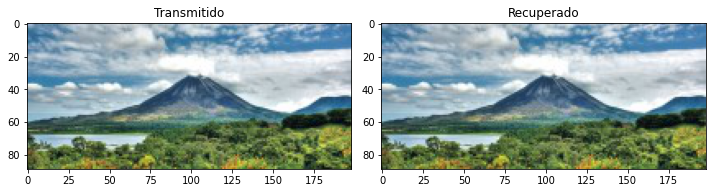

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parámetros
fc = 10000  # frecuencia de la portadora
mpp = 30   # muestras por periodo de la portadora
SNR = 0   # relación señal-a-ruido del canal

# Iniciar medición del tiempo de simulación
inicio = time.time()

# 1. Importar y convertir la imagen a trasmitir
imagen_Tx = fuente_info('arenal.jpg')
dimensiones = imagen_Tx.shape

# 2. Codificar los pixeles de la imagen
bits_Tx = rgb_a_bits(imagen_Tx)

# 3. Modular la cadena de bits usando el esquema BPSK
senal_Tx, Pm, portadora, moduladora = modulador(bits_Tx, fc, mpp)

# 4. Se transmite la señal modulada, por un canal ruidoso
senal_Rx = canal_ruidoso(senal_Tx, Pm, SNR)

# 5. Se desmodula la señal recibida del canal
bits_Rx, senal_demodulada = demodulador(senal_Rx, portadora, mpp)

# 6. Se visualiza la imagen recibida 
imagen_Rx = bits_a_rgb(bits_Rx, dimensiones)
Fig = plt.figure(figsize=(10,6))

# Cálculo del tiempo de simulación
print('Duración de la simulación: ', time.time() - inicio)

# 7. Calcular número de errores
errores = sum(abs(bits_Tx - bits_Rx))
BER = errores/len(bits_Tx)
print('{} errores, para un BER de {:0.4f}.'.format(errores, BER))

# Mostrar imagen transmitida
ax = Fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(imagen_Tx)
ax.set_title('Transmitido')

# Mostrar imagen recuperada
ax = Fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(imagen_Rx)
ax.set_title('Recuperado')
Fig.tight_layout()

plt.imshow(imagen_Rx)

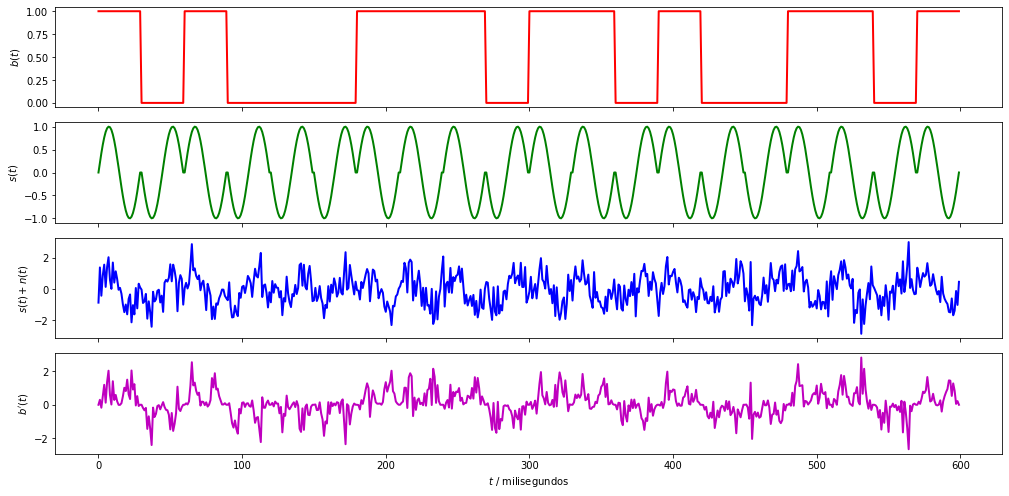

In [ ]:
import matplotlib.pyplot as plt

# Visualizar el cambio entre las señales
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(14, 7))

# La onda cuadrada moduladora (bits de entrada)
ax1.plot(moduladora[0:600], color='r', lw=2) 
ax1.set_ylabel('$b(t)$')

# La señal modulada por BPSK
ax2.plot(senal_Tx[0:600], color='g', lw=2) 
ax2.set_ylabel('$s(t)$')

# La señal modulada al dejar el canal
ax3.plot(senal_Rx[0:600], color='b', lw=2) 
ax3.set_ylabel('$s(t) + n(t)$')

# La señal demodulada
ax4.plot(senal_demodulada[0:600], color='m', lw=2) 
ax4.set_ylabel('$b^{\prime}(t)$')
ax4.set_xlabel('$t$ / milisegundos')
fig.tight_layout()
plt.show()

### 3.3. - Modulación IQ

Obsérvese que en la modulación BPSK anterior existe una única portadora (*carrier*) sinusoidal, dada por

$$
c(t) = A_c \sin(2\pi f_c t - \theta_c)
$$

La propiedad de la **ortogonalidad** entre las funciones $\sin(\omega t)$ y $\cos(\omega t)$ permite utilizar dos portadoras en lugar de una, de forma tal que es posible crear una señal modulada del tipo:

$$
s(t) = A_1 \cos(2\pi f_c t) + A_2 \sin(2\pi f_c t)
$$

Esta señal ocupa el mismo ancho de banda que una sola portadora sinusoidal, pero puede transportar el doble de la información, codificada en $A_1$ y $A_2$. Debido a que las ondas seno y coseno están separadas por un desfase de 90 grados, a este tipo de modulación se le llama "en fase" (**I**, *in phase*) y "en cuadratura" (**Q**, *quadrature*), o **modulación IQ**.

#### 3.3.1. - Ortogonalidad

La prueba de ortogonalidad de dos funciones del tiempo está dada por el producto interno:

$$
\begin{aligned}
(f * g) (t) & = \langle f(t), g(t)\rangle \\
& = \int f(t) g(t) \, \mathrm{d}t            
\end{aligned}
$$

Y en el caso de las dos portadoras sinusoidales:

$$
\begin{aligned}
(f * g) (t) & = \langle f(t), g(t)\rangle \\
& = \int f(t) g(t) \, \mathrm{d}t \\
& = \int \cos(2\pi f_c t) \, \sin(2\pi f_c t) \, \mathrm{d}t \\
& = 0 
\end{aligned}
$$

> Podría decirse, coloquialmente, que las portadoras viajan "juntas pero no revueltas". 

Este resultado es útil para la *demodulación coherente (en fase)* de señales IQ, porque permite "separar" una portadora de otra.

#### 3.3.2. - Modulación QPSK

La modulación BPSK tiene dos símbolos posibles (`0`, `1`) lo que implica un bit $b$ por símbolo, mientras que la modulación QPSK (*Quadrature Phase-Shift Keying*) tiene cuatro símbolos posibles (`00`, `01`, `10`, `11`), con dos bits $b_1 b_2$ por símbolo. La codificación para un símbolo $b_1 b_2$ es ahora:

$$
s(t) = A_1 \cos(2\pi f_c t) + A_2 \sin(2\pi f_c t)
$$

donde

$$
A_1 = 
\begin{cases}
             -1, &   \text{si} \quad b_1 = 0 \\
             1, &  \text{si}   \quad b_1 = 1 \\
\end{cases}
$$

y

$$
A_2 = 
\begin{cases}
             -1, &   \text{si} \quad b_2 = 0 \\
              1, &   \text{si} \quad b_2 = 1 \\
\end{cases}
$$

<img src="https://www.analog.com/-/media/analog/en/landing-pages/technical-articles/low-power-iq-modulator-for-digital-communications/iqmodulator.png?h=270&hash=868F3CDB85D7842D27627F7A12099156E9729935&la=en" width="400">

Si se grafica la amplitud $A_1$ y $A_2$ de cada portadora en una gráfica donde el eje $x$ representa al coseno (en fase, $I$) y el eje $y$ al seno (en cuadratura, $Q$), se obtiene lo que se conoce como un "diagrama de constelación" de la modulación:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/QPSK_Gray_Coded.svg/800px-QPSK_Gray_Coded.svg.png' width='200'>

Ahí es posible verificar la correspondencia de los bits $b_1 b_2$ (`00`, `01`, `10`, `11`) con los puntos de la constelación.

> La modulación QPSK es utilizada en el estándar Wi-Fi IEEE 802.11 (una de sus posibles modulaciones), en comunicaciones satelitales, y en 5G, entre otros.

#### 3.3.3. - Modulación 8-PSK

La modulación 8-PSK tiene ocho símbolos posibles con tres bits $b_1 b_2 b_3$ por símbolo. La codificación para un símbolo $b_1 b_2 b_3$ es ahora:

$$
s(t) = A_1 \cos(2\pi f_c t) + A_2 \sin(2\pi f_c t)
$$

donde

$$
\begin{cases}
    A_1 = 1, & A_2 = 0 & \text{si} \quad b_1 b_2 b_3 = 111 \\
    A_1 = h, & A_2 = h & \text{si} \quad b_1 b_2 b_3 = 110 \\
    A_1 = 0, & A_2 = 1 & \text{si} \quad b_1 b_2 b_3 = 010 \\
    A_1 =-h, & A_2 = h & \text{si} \quad b_1 b_2 b_3 = 011 \\
    A_1 =-1, & A_2 = 0 & \text{si} \quad b_1 b_2 b_3 = 001 \\
    A_1 =-h, & A_2 =-h & \text{si} \quad b_1 b_2 b_3 = 000 \\
    A_1 = 0, & A_2 =-1 & \text{si} \quad b_1 b_2 b_3 = 100 \\
    A_1 = h, & A_2 =-h & \text{si} \quad b_1 b_2 b_3 = 101 \\
\end{cases}
$$

donde $h = 1\sin(45^o) = 1\cos(45^o) = \sqrt{2}/2 \approx 0.707$.

El diagrama de constelación de la modulación es:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/8PSK_Gray_Coded.svg/400px-8PSK_Gray_Coded.svg.png" width="200">

Ahí es posible verificar la correspondencia de los bits $b_1 b_2 b_3$ (`000`, `001`, `010`, `011`, `100`, `101`, `110`, `111`) con los puntos de la constelación.

#### 3.3.4. - Modulación QAM

La modulación de amplitud en cuadratura (**QAM**, *Quadrature Amplitude Modulation*) es otro tipo de modulación IQ que ahora utiliza más posibles amplitudes de las dos portadoras para crear una constelación como la siguiente:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/16QAM_Gray_Coded.svg/1280px-16QAM_Gray_Coded.svg.png" width="250">

en donde se aprecian dos valores positivos y dos valores negativos para cada portadora. Este es el caso 16-QAM, en tanto que tiene 16 símbolos de 4 bits cada uno ($2^4 = 16$).

La codificación para un símbolo $b_1 b_2 b_3 b_4$ es:

$$
s(t) = A_1 \cos(2\pi f_c t) + A_2 \sin(2\pi f_c t)
$$

donde

$$
A_1 = 
\begin{cases}
             -3, &   \text{si} \quad b_1 b_2 = 00 \\
             -1, &   \text{si} \quad b_1 b_2 = 01 \\
             1, &  \text{si}   \quad b_1 b_2 = 11 \\
             3, &  \text{si}   \quad, b_1 b_2 = 10 \\
\end{cases}
$$

y

$$
A_2 = 
\begin{cases}
             3, &   \text{si} \quad b_3 b_4 = 00 \\
             1, &   \text{si} \quad b_3 b_4 = 01 \\
             -1, &  \text{si}   \quad b_3 b_4 = 11 \\
             -3, &  \text{si}   \quad b_3 b_4 = 10 \\
\end{cases}
$$

> La modulación QAM es también utilizada en el estándar Wi-Fi IEEE 802.11 de forma adaptativa, por lo que puede ir desde 16-QAM (4 bits/símbolo) hasta 512-QAM (9 bits/símbolo) cuando las condiciones del canal son óptimas.

---
* Elaboración de nota teórica y demostración: **Jeaustin Sirias Chacón**, como parte de IE0499 - Proyecto Eléctrico: *Estudio y simulación de aplicaciones de la teoría de probabilidad en la ingeniería eléctrica*.
* Revisión y edición: **Fabián Abarca Calderón**

---
## 4. - Asignaciones del proyecto

### 4.1. - Modulación QPSK

* (40%) Realice una simulación del sistema de comunicaciones como en la sección 3.2., pero utilizando una modulación **QPSK** en lugar de una modulación BPSK. Deben mostrarse las imágenes enviadas y recuperadas y las formas de onda.

### 4.2. - Estacionaridad y ergodicidad

* (20%) Realice pruebas de estacionaridad y ergodicidad a la señal modulada `senal_Tx` y obtenga conclusiones sobre estas.

### 4.3. - Autocorrelación y autocovarianza

* (20%) Realice pruebas de autocorrelación y autocovarianza a la señal modulada `senal_Tx` y obtenga conclusiones sobre estas.

### 4.4. - Densidad espectral de potencia

* (20%) Determine y grafique la densidad espectral de potencia para la señal modulada `senal_Tx`.

\begin{equation}
\displaystyle
\mathcal{S}_{XX}(\omega) = \lim_{T \rightarrow \infty}\frac{E[\vert X_{T}(\omega) \vert^2]}{2T}
\end{equation}

#### Entrega de resultados

Crear un *notebook* nuevo de Jupyter y exportar como HTML.

211464 422928
Duración de la simulación:  9.942599058151245
0 errores, para un BER de 0.0000.


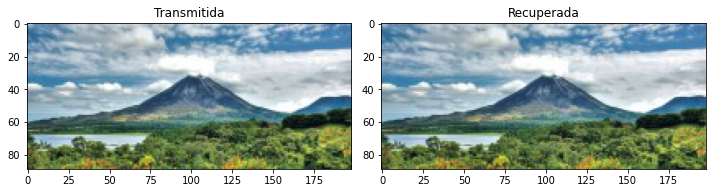

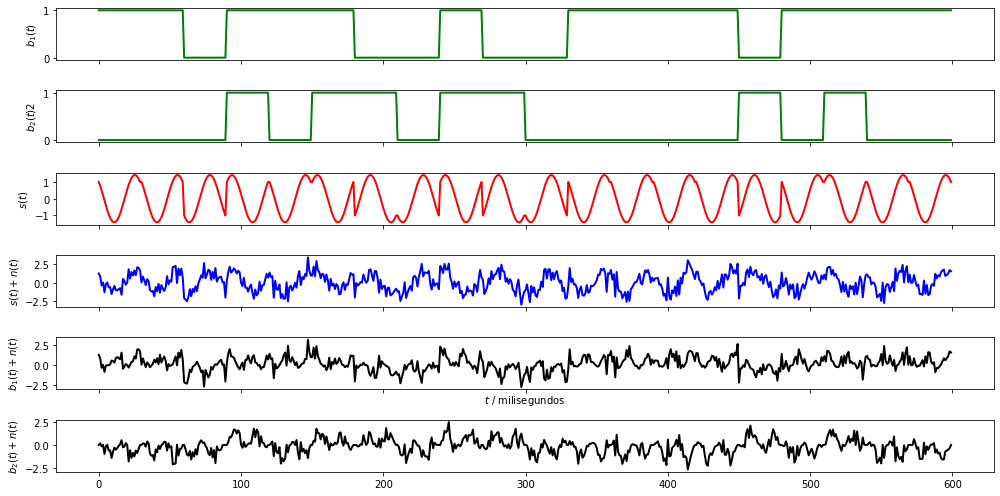

In [ ]:
# 4.1
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image

# Se utilizan las funciones  dadas

def fuente_info(imagen):
    
    img = Image.open(imagen)

    return np.array(img)


def rgb_a_bits(array_imagen):
    
    # Obtener las dimensiones de la imagen
    x, y, z = array_imagen.shape

    # Número total de elementos (pixeles x canales)
    n_elementos = x * y * z

    # Convertir la imagen a un vector unidimensional de n_elementos
    pixeles = np.reshape(array_imagen, n_elementos)

    # Convertir los canales a base 2
    bits = [format(pixel, '08b') for pixel in pixeles]
    bits_Rx = np.array(list(''.join(bits)))

    return bits_Rx.astype(int)

# Modulador QPSK

def modulador(bits, fc, mpp):
    
    # 1. Parámetros de la 'señal' de información (bits)
    N = len(bits)  # Cantidad de bits

    # 2. Construyendo un periodo de la señal portadora c(t)
    Tc = 1 / fc  # periodo [s]
    t_periodo = np.linspace(0, Tc, mpp)  # mpp: muestras por período
    portador1 = np.cos(2*np.pi*fc*t_periodo)
    portador2 = np.sin(2*np.pi*fc*t_periodo)

    # 3. Inicializar la señal modulada s(t)
    t_simulacion = np.linspace(0, N*Tc, N*mpp)
    senal_Tx = np.zeros(t_simulacion.shape)
    modulador1 = np.zeros(t_simulacion.shape)  # señal de bits
    modulador2 = np.zeros(t_simulacion.shape)  # señal de bits

    # 4. Asignar las formas de onda según los bits (QPSK)
    bits2 = [[bits[i], bits[i+1]] for i in range(0, len(bits), 2)]
    print(len(bits2), len(bits))  # Comparamos el tama;o
    for i, bit in enumerate(bits2):  # Asignamos las formas segun QPSK
        if bit[0] == 1:
            if bit[1] == 1:
                senal_Tx[i*mpp:(i+1)*mpp] = portador1+portador2
                modulador1[i*mpp:(i+1)*mpp] = 1
                modulador2[i*mpp:(i+1)*mpp] = 1
            else:
                senal_Tx[i*mpp:(i+1)*mpp] = portador1-portador2
                modulador1[i*mpp:(i+1)*mpp] = 1
                modulador2[i*mpp:(i+1)*mpp] = 0
        else:
            if bit[1] == 1:
                senal_Tx[i*mpp:(i+1)*mpp] = -portador1+portador2
                modulador1[i*mpp:(i+1)*mpp] = 0
                modulador2[i*mpp:(i+1)*mpp] = 1
            else:
                senal_Tx[i*mpp:(i+1)*mpp] = -portador1-portador2
                modulador1[i*mpp:(i+1)*mpp] = 0
                modulador2[i*mpp:(i+1)*mpp] = 0

    # 5. Calcular la potencia promedio de la señal modulada
    P_senal_Tx = (1 / (N*Tc)) * np.trapz(pow(senal_Tx, 2), t_simulacion)

    return senal_Tx, P_senal_Tx, [portador1,
                                  portador2], [modulador1, modulador2]

# Canal con ruido AWGN

def canal_ruidoso(senal_Tx, Pm, SNR):
    
    # Potencia del ruido generado por el canal
    Pn = Pm / pow(10, SNR/10)

    # Generando ruido auditivo blanco gaussiano (potencia = varianza)
    ruido = np.random.normal(0, np.sqrt(Pn), senal_Tx.shape)

    # Señal distorsionada por el canal ruidoso
    senal_Rx = senal_Tx + ruido

    return senal_Rx

# Esquema de demodulación

def demodulador(senal_Rx, portador, mpp):
    
    # Cantidad de muestras en senal_Rx
    M = len(senal_Rx)

    # Cantidad de bits (símbolos) en transmisión
    N = int(M / mpp)

    # Vector para bits obtenidos por la demodulación
    bits_Rx1 = np.zeros(N)
    bits_Rx2 = np.zeros(N)

    # Vector para la señal demodulada
    senal_demodulada1 = np.zeros(senal_Rx.shape)
    senal_demodulada2 = np.zeros(senal_Rx.shape)

    # Pseudo-energía de un período de la portadora
    # Es = np.sum(portadora * portadora)

    # Demodulación
    for i in range(N):
        # Producto interno de dos funciones
        producto1 = senal_Rx[i*mpp:(i+1)*mpp] * portador[0]
        Ep1 = np.sum(producto1)
        senal_demodulada1[i*mpp:(i+1)*mpp] = producto1

        producto2 = senal_Rx[i*mpp:(i+1)*mpp] * portador[1]
        Ep2 = np.sum(producto2)
        senal_demodulada2[i*mpp:(i+1)*mpp] = producto2

        # Criterio de decisión por detección de energía
        if Ep1 > 0:
            bits_Rx1[i] = 1
        else:
            bits_Rx1[i] = 0
        if Ep2 > 0:
            bits_Rx2[i] = 1
        else:
            bits_Rx2[i] = 0
    bits_Rx = np.zeros(N)
    j = 0

    # Se vuelven a acomodar los bits en el orden apropiado.
    for i in range(N):
        if i % 2 == 0:
            bits_Rx[i] = bits_Rx1[j]
        else:
            bits_Rx[i] = bits_Rx2[j]
            j += 1
    return bits_Rx.astype(int), [senal_demodulada1, senal_demodulada2]

# Reconstrucción de la imagen


def bits_a_rgb(bits_Rx, dimensiones):
    
    # Cantidad de bits
    N = len(bits_Rx)

    # Se reconstruyen los canales RGB
    bits = np.split(bits_Rx, N / 8)

    # Se decofican los canales:
    canales = [int(''.join(map(str, canal)), 2) for canal in bits]
    pixeles = np.reshape(canales, dimensiones)

    return pixeles.astype(np.uint8)

# Simulación de sistema de comunicaciones

# Parámetros
fc = 10000  # frecuencia de la portadora
mpp = 30   # muestras por periodo de la portadora
SNR = 0   # relación señal-a-ruido del canal

# Iniciar medición del tiempo de simulación
inicio = time.time()

# 1. Importar y convertir la imagen a trasmitir
imagen_Tx = fuente_info('arenal.jpg')
dimensiones = imagen_Tx.shape

# 2. Codificar los pixeles de la imagen
bits_Tx = rgb_a_bits(imagen_Tx)

# 3. Modular la cadena de bits usando el esquema BPSK
senal_Tx, Pm, portador, modulador = modulador(bits_Tx, fc, mpp)

# 4. Se transmite la señal modulada, por un canal ruidoso
senal_Rx = canal_ruidoso(senal_Tx, Pm, SNR)

# 5. Se desmodula la señal recibida del canal
bits_Rx, senal_demodulada = demodulador(senal_Rx, portador, mpp)

# 6. Se visualiza la imagen recibida
imagen_Rx = bits_a_rgb(bits_Rx, dimensiones)
Fig = plt.figure(figsize=(10, 6))

# Cálculo del tiempo de simulación
print('Duración de la simulación: ', time.time() - inicio)

# 7. Calcular número de errores
errores = sum(abs(bits_Tx - bits_Rx))
BER = errores/len(bits_Tx)
print('{} errores, para un BER de {:0.4f}.'.format(errores, BER))

# Mostrar imagen transmitida
ax = Fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(imagen_Tx)
ax.set_title('Transmitida')

# Mostrar imagen recuperada
ax = Fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(imagen_Rx)
ax.set_title('Recuperada')
Fig.tight_layout()
plt.imshow(imagen_Rx)

# Visualizar el cambio entre las señales
fig, (ax1, ax2, ax3, ax4, ax5,
      ax6) = plt.subplots(nrows=6, sharex=True, figsize=(14, 7))

# La onda cuadrada moduladora (bits de entrada)
ax1.plot(modulador[0][0:600], color='g', lw=2)
ax1.set_ylabel('$b_1(t)$')

# La onda cuadrada moduladora
ax2.plot(modulador[1][0:600], color='g', lw=2)
ax2.set_ylabel('$b_2(t)2$')

# La señal modulada por BPSK
ax3.plot(senal_Tx[0:600], color='r', lw=2)
ax3.set_ylabel('$s(t)$')

# La señal modulada al dejar el canal
ax4.plot(senal_Rx[0:600], color='b', lw=2)
ax4.set_ylabel('$s(t) + n(t)$')

# La señal demodulada
ax5.plot(senal_demodulada[0][0:600], color='k', lw=2)
ax5.set_ylabel('$b_1(t) + n(t)$')

ax6.plot(senal_demodulada[1][0:600], color='k', lw=2)
ax6.set_ylabel('$b_2(t) + n(t)$')
ax5.set_xlabel('$t$ / milisegundos')
fig.tight_layout()
plt.show()


4.3. - Autocorrelación y autocovarianza
(20%) Realice pruebas de autocorrelación y autocovarianza a la señal modulada senal_Tx y obtenga conclusiones sobre estas.

Autocorrelacion para distintos valores de Tau  [ 1.          0.94910164  0.8597652   0.73888413  0.59442175  0.4349308
  0.26906949  0.10514048 -0.04932288 -0.18790271 -0.30555899 -0.39879797
 -0.4657416  -0.50609935 -0.521049   -0.51303823 -0.48552307 -0.44266223
 -0.38898827 -0.32907754 -0.26723946 -0.20724458 -0.15210714 -0.10393434
 -0.06384988 -0.03199414 -0.00759873  0.01087198  0.02552398  0.03879624
  0.05320057  0.08534804  0.10942003  0.12466925  0.13093402  0.12861999
  0.11864859  0.10237582  0.08148734  0.05787632  0.03351212]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


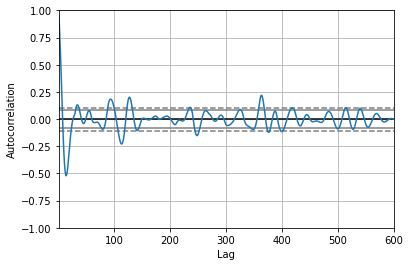

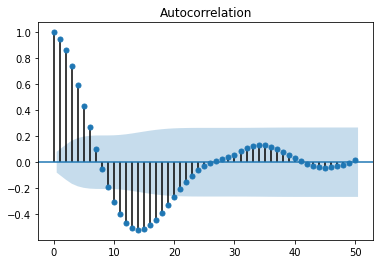

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm

#calcular autocorrelaciones
def get_autocorrelation():
  """
  Esta funcion calcula la autocorrelacion de la senal Tx y la grafica. Se utiliza
  la libreria statsmodels. El eje x del grafico representa los Lags, es decir el valor
  de Tau, t+1, t+2, ... t+600, las observaciones en el tiempo. 
  """

  # Calculo de la autorelacion
  autocorrelacion_senalTx = pd.plotting.autocorrelation_plot(senal_Tx[0:600])
  print("Autocorrelacion para distintos valores de Tau ",sm.tsa.acf (senal_Tx[0:600]))

  # Graficamos la autocorrelacion hasta t+600  
  autocorrelacion_senalTx.plot() 
  plt.show()

  # Hacemos un acercamiento a la autocorrelacion para analizarla
  plot_acf(senal_Tx[0:600], lags=50)
  plt.show()

get_autocorrelation()

# Analisis:

Como puede observarse en la primera y segunda grafica, la autocorrelacion es mayor en las primeras diferencias de tiempo. Puede verse que despues de 20 diferencias de tiempo (20 Taus -> t+20) la autocorrelacion se encuentra dentro de la banda azul, esta banda representa la confiabilidad , lo cual quiere decir que cuando los valores estan dentro de esta banda no son muy relevantes, es decir que en t+20 la afectacion de t+1 es muy pequena. Sin embargo puede verse que al principio la autocorrelacion es bastante alta porque se encuentra entre 0.5 y 1. Es decir en las primeras observaciones en el tiempo hay una autocorrelacion positiva, lo que quiere decir que el incremento en el tiempo conlleva a un incremento en el tiempo+k con k siendo el Tau del eje x. 

Vemos que esto cambia entre k 10 y 20 donde se llega a observar una autocorrelacion negativa, es decir que mas bien el incremento que se observa en el tiempo anterior conlleva a un decremento en el tiempo posterior t+k. 

En general, ante la observacion t y t+Tau donde Tau es solo 1 periodo despues la autocorrelacion es positiva.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:354: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


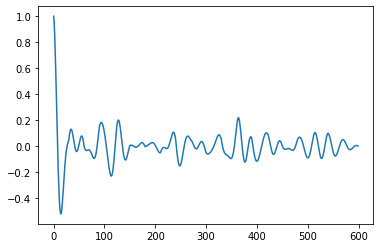

Promedio de la senal Tx:  0.0
Autocovarianzas de diferentes Taus:  [ 0.99982222  0.94893291  0.85961235  0.73875277  0.59431608  0.43485348
  0.26902165  0.10512179 -0.04931412 -0.18786931 -0.30550467 -0.39872707
 -0.4656588  -0.50600938 -0.52095637 -0.51294702 -0.48543676 -0.44258353
 -0.38891912 -0.32901903 -0.26719195 -0.20720774 -0.1520801  -0.10391586
 -0.06383853 -0.03198845 -0.00759738  0.01087005  0.02551944  0.03878934
  0.05319111  0.08533287  0.10940058  0.12464709  0.13091074  0.12859713
  0.11862749  0.10235762  0.08147285  0.05786603  0.03350616  0.01030591
 -0.01000406 -0.02598616 -0.03658594 -0.04119575 -0.03968837 -0.03241888
 -0.0201947  -0.00421598]


In [ ]:
def get_autocovariance():
  """
  En esta funcion se calcula la autocovarianza haciendo uso de la libreria
  stattools con la funcion acovf, la cual hace un estimado de las autocovarianzas.
  Al igual que para con la autocorrelacion se va a graficar para diferentes
  Taus, es decir diferentes observaciones en el tiempo. 
  """
  #Calculamos la autocovarianza
  autocovariance= smt.stattools.acovf(senal_Tx[0:600]) 
  plt.plot(autocovariance)
  plt.show()

  #Imprimimos el promedio de la sennal
  average_signal = np.average(senal_Tx[0:600])
  print("Promedio de la senal Tx: ", round(average_signal,1))
  print("Autocovarianzas de diferentes Taus: ", autocovariance[0:50])


get_autocovariance()



# Analisis

La autocovarianza de la senal nos indica que tanto varian las variables de un tiempo t a un tiempo t +Tau. Al igual que con la autocorrelacion se calcula las autocovarianzas para diferentes Taus y se grafica. Puede notarse en el print, y en la grafica que las autocovarianzas son practicamente iguales a las autocorrelaciones, esto tiene sentido puesto que la covarianza tambien se define con la ecuacion:

$C_{xx} (t,t + τ) =  R_{xx}(t,t + τ) - E[X(t)]E[X(t + τ)]$

Lo cual significa que si el promedio $E[X(t)] o E[X(t + τ)]$ es 0, se obtiene:

$C_{xx} (t,t + τ) =  R_{xx}(t,t + τ)$

Donde $R_{xx}(t,t + τ)$ es la autocorrelacion de la senal. Es decir que la autocovarianza y la autocorrelacion son iguales.

En este caso, lo que esto representa es que por ejemplo en los primeros Taus, la autocovarianza es positiva y quiere decir que cuanto en t la variable crece, en t+Tau tambien crece. Despues de ciertos taus la autocovarianza se hace muy pequena y es casi irrelevante, esto debido a que el t+50 no se ve afectado por la variable en t, lo cual tiene sentido, entre mas observaciones se hace la autocovarianza es mas pequena. Sin embargo de t a t +1 es muy alta. Puede verse tambien que existen Taus donde la autocovarianza es negativa lo que indica que cuando la variable crece la otra decrece, manteniendo una relación inversa.

En general para t y t+1, la autocovarianza fue positiva y casi de 0.95, lo cual tiene sentido debido a que como se observo en las graficas de las senales, si empezaba a crecer el punto inmediato lo hace, sin embargo 10 puntos depues mas bien empieza a decrecer.



---
**Universidad de Costa Rica** | Facultad de Ingeniería | Escuela de Ingeniería Eléctrica

&copy; 2022

---